In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense

import os
import numpy as np
import matplotlib.pyplot as plt

In [0]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [0]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator(rescale = 1./255)

In [21]:
#Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (150,150, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
from keras.layers import Flatten

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(150, 150,..., activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`


In [24]:
training_set = train_datagen.flow_from_directory(directory= train_dir,
                                                 target_size = (150, 150),
                                                 shuffle= True,
                                                 batch_size = 128,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory(directory= validation_dir,
                                            target_size = (150, 150),
                                            shuffle= True,
                                            batch_size = 128,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [25]:
dogcat= classifier.fit_generator(training_set,
                         steps_per_epoch = len(training_set),
                         nb_epoch = 20,
                         validation_data = test_set,
                         validation_steps = len(test_set))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=16, validation_data=<keras_pre..., validation_steps=8, epochs=20)`
  """





Epoch 1/20





16/16 [==============================] - 21s 1s/step - loss: 0.7708 - acc: 0.4986 - val_loss: 0.6929 - val_acc: 0.5030
Epoch 2/20
16/16 [==============================] - 16s 975ms/step - loss: 0.6909 - acc: 0.5307 - val_loss: 0.6858 - val_acc: 0.5260
Epoch 3/20
16/16 [==============================] - 16s 976ms/step - loss: 0.6585 - acc: 0.6321 - val_loss: 0.8071 - val_acc: 0.5150
Epoch 4/20
16/16 [==============================] - 16s 974ms/step - loss: 0.6687 - acc: 0.6270 - val_loss: 0.6346 - val_acc: 0.5990
Epoch 5/20
16/16 [==============================] - 16s 981ms/step - loss: 0.6242 - acc: 0.6534 - val_loss: 0.6332 - val_acc: 0.6520
Epoch 6/20
16/16 [==============================] - 16s 976ms/step - loss: 0.6298 - acc: 0.6621 - val_loss: 0.6387 - val_acc: 0.6580
Epoch 7/20
16/16 [==============================] - 16s 973ms/step - loss: 0.6073 - acc: 0.6776 - val_loss: 0.5978 - val_acc: 0.6730
Epoch 8/20
16/16 [==============================] - 16s 977ms/st

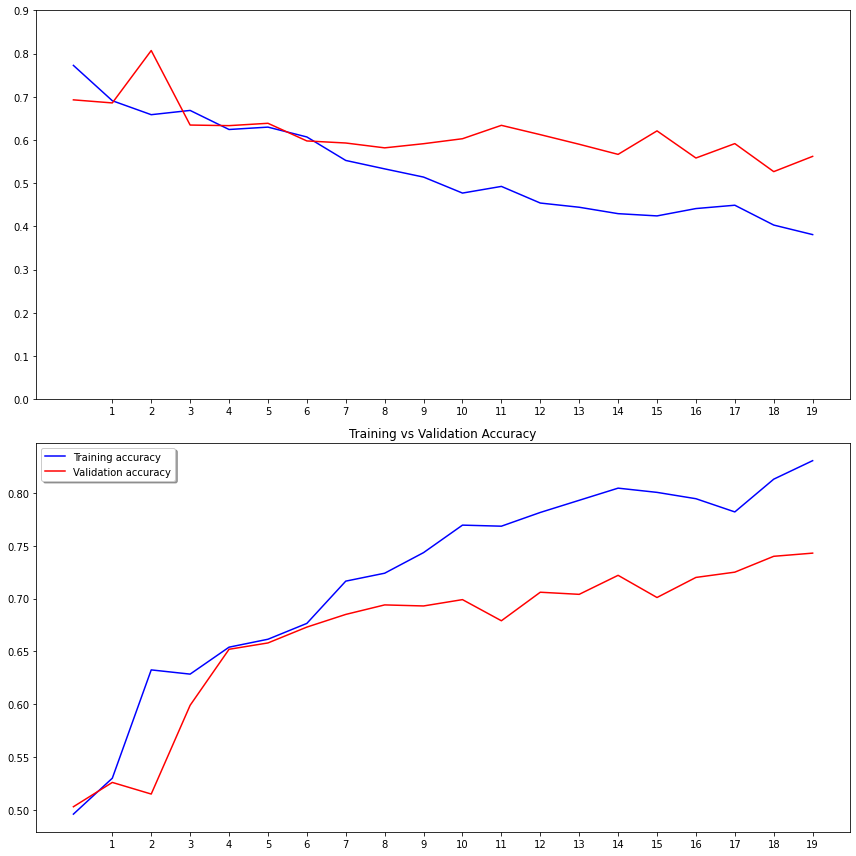

In [31]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(dogcat.history['loss'], color='b', label="Training loss")
ax1.plot(dogcat.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 20, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))
plt.title('Training vs Validation Loss')

ax2.plot(dogcat.history['acc'], color='b', label="Training accuracy")
ax2.plot(dogcat.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 20, 1))
plt.title('Training vs Validation Accuracy')

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()


In [32]:
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (150,150, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.1))
from keras.layers import Flatten

# Step 3 - Flattening
classifier.add(Flatten())
classifier.add(Dropout(0.1))
# Step 4 - Full connection
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(150, 150,..., activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`


In [33]:
training_set = train_datagen.flow_from_directory(directory= train_dir,
                                                 target_size = (150, 150),
                                                 shuffle= True,
                                                 batch_size = 128,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory(directory= validation_dir,
                                            target_size = (150, 150),
                                            shuffle= True,
                                            batch_size = 128,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [34]:
dogcat= classifier.fit_generator(training_set,
                         steps_per_epoch = len(training_set),
                         nb_epoch = 20,
                         validation_data = test_set,
                         validation_steps = len(test_set))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=16, validation_data=<keras_pre..., validation_steps=8, epochs=20)`
  """


Epoch 1/20
16/16 [==============================] - 17s 1s/step - loss: 1.0998 - acc: 0.4953 - val_loss: 0.6951 - val_acc: 0.4990
Epoch 2/20
16/16 [==============================] - 16s 1s/step - loss: 0.6903 - acc: 0.5394 - val_loss: 0.6805 - val_acc: 0.5010
Epoch 3/20
16/16 [==============================] - 16s 997ms/step - loss: 0.6739 - acc: 0.5563 - val_loss: 0.6637 - val_acc: 0.6320
Epoch 4/20
16/16 [==============================] - 16s 1s/step - loss: 0.6556 - acc: 0.6258 - val_loss: 0.6380 - val_acc: 0.6430
Epoch 5/20
16/16 [==============================] - 16s 996ms/step - loss: 0.6213 - acc: 0.6528 - val_loss: 0.5975 - val_acc: 0.6570
Epoch 6/20
16/16 [==============================] - 16s 992ms/step - loss: 0.5840 - acc: 0.6964 - val_loss: 0.5905 - val_acc: 0.6870
Epoch 7/20
16/16 [==============================] - 16s 1s/step - loss: 0.5646 - acc: 0.7040 - val_loss: 0.5608 - val_acc: 0.6990
Epoch 8/20
16/16 [==============================] - 16s 995ms/step - loss: 0.5437

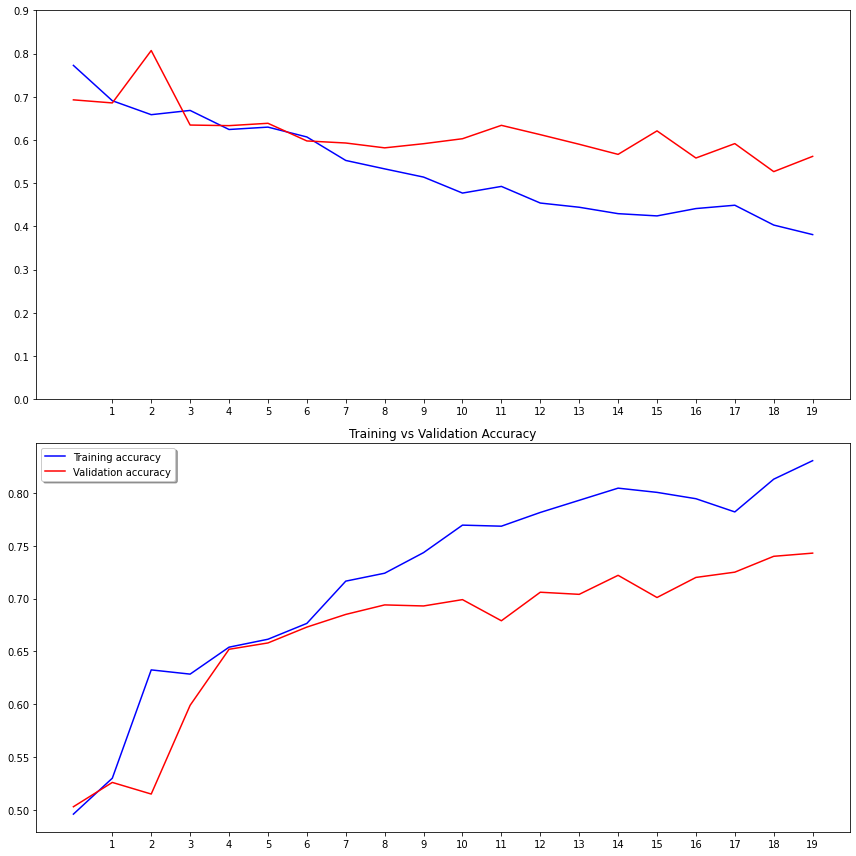

In [0]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(dogcat.history['loss'], color='b', label="Training loss")
ax1.plot(dogcat.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 20, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))
plt.title('Training vs Validation Loss')

ax2.plot(dogcat.history['acc'], color='b', label="Training accuracy")
ax2.plot(dogcat.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 20, 1))
plt.title('Training vs Validation Accuracy')

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()
